In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [8]:
import warnings 
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [9]:
# Veriyi yükleme
file_path = "C:/Users/melisa/Desktop/hackathon/dataset.xlsx"
df = pd.read_excel(file_path)

In [10]:
# Zaman damgasını datetime formatına çevirme
df['TIME_STAMP'] = pd.to_datetime(df['TIME_STAMP'])

In [11]:
# Zaman serisine göre sıralama
df = df.sort_values('TIME_STAMP').set_index('TIME_STAMP')

In [12]:
# Sadece 'DOWNLOAD' kolonu ile çalışma
download_series = df['DOWNLOAD']

In [13]:
# Zaman serisinin sadece ilk 500 verisini kullanarak modeli eğitme
download_series = download_series.iloc[:500]

In [14]:
# SARIMA modelini fit etme
model = SARIMAX(download_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

In [15]:
# In-sample tahminler
in_sample_preds = model_fit.fittedvalues

In [16]:
# Rezidüleri hesaplama
residuals = download_series - in_sample_preds

In [17]:
# Anomali eşik değeri belirleme
anomaly_threshold = 3 * residuals.std()

In [18]:
# Anomalileri bulma
anomalies = residuals[abs(residuals) > anomaly_threshold]

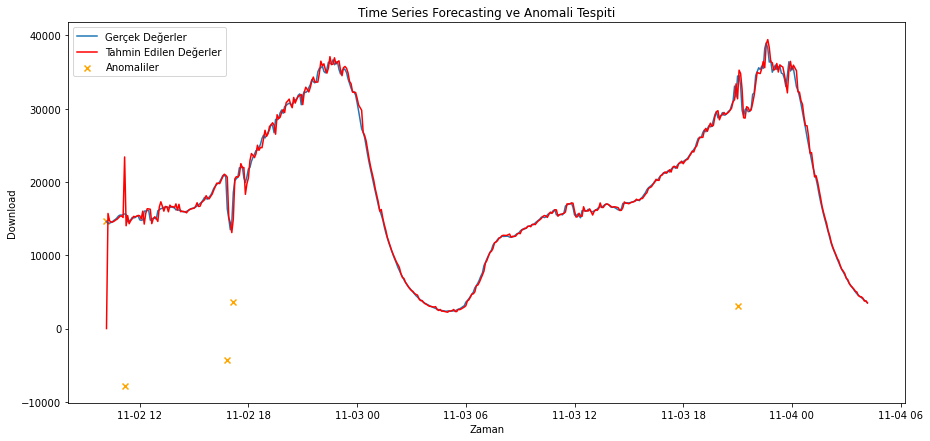

In [19]:
# Sonuçları görselleştirme
plt.figure(figsize=(15, 7))
plt.plot(download_series, label='Gerçek Değerler')
plt.plot(in_sample_preds, color='red', label='Tahmin Edilen Değerler')
plt.scatter(anomalies.index, anomalies, color='orange', label='Anomaliler', marker='x')
plt.xlabel('Zaman')
plt.ylabel('Download')
plt.title('Time Series Forecasting ve Anomali Tespiti')
plt.legend()
plt.show()

In [20]:
# Sadece 'UPLOAD' kolonu ile çalışma
upload_series= df['UPLOAD']

In [22]:
# Zaman serisinin sadece ilk 500 verisini kullanarak modeli eğitme
upload_series= upload_series.iloc[:500]

In [23]:
# SARIMA modelini fit etme
model = SARIMAX(upload_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

In [24]:
# In-sample tahminler
in_sample_preds = model_fit.fittedvalues

In [25]:
# Rezidüleri hesaplama
residuals = upload_series - in_sample_preds

In [26]:
# Anomali eşik değeri belirleme
anomaly_threshold = 3 * residuals.std()

In [27]:
# Anomalileri bulma
anomalies = residuals[abs(residuals) > anomaly_threshold]

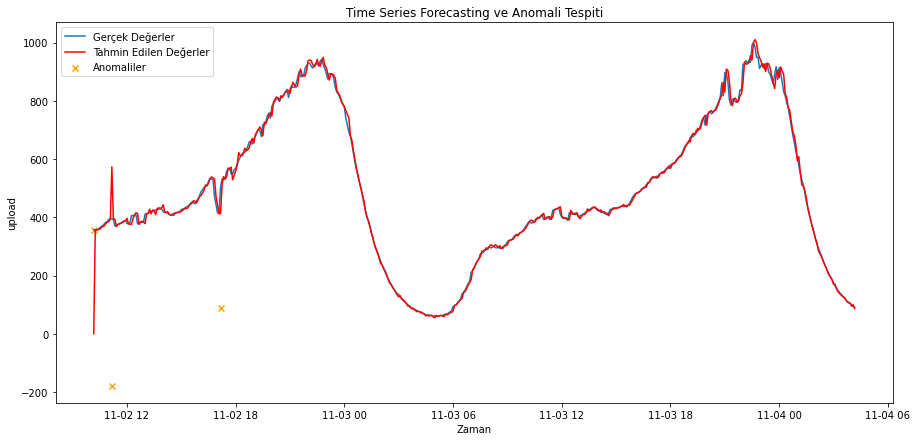

In [28]:
# Sonuçları görselleştirme
plt.figure(figsize=(15, 7))
plt.plot(up load_series, label='Gerçek Değerler')
plt.plot(in_sample_preds, color='red', label='Tahmin Edilen Değerler')
plt.scatter(anomalies.index, anomalies, color='orange', label='Anomaliler', marker='x')
plt.xlabel('Zaman')
plt.ylabel('upload')
plt.title('Time Series Forecasting ve Anomali Tespiti')
plt.legend()
plt.show()